# M08T04 - The Qiskit SDK

## Dependencies

In [1]:
# numpy
import numpy as np

# qiskit
import qiskit as qk
import qiskit.visualization as qkv

## Initializations

In [2]:
# IBMQ account
qk.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Functions

In [3]:
def random_init_pure_state(qcirc, num_q):
    """Function to initialize a random qubit state on the Block sphere.

    Args:
        qcirc (:obj:`QuantumCircuit`): The quantum circuit.
        num_q (int): Number of qbits
    """
    # generate random numbers from a uniform distribution
    r = np.random.uniform(size=num_q)
    # for each qbit state
    for i in range(num_q):
        # get coefficients of computational basis
        init_q  = [np.sqrt(r[i]), np.sqrt(1 - r[i])]
        # initialize i-th quantum state
        qcirc.initialize(init_q, i)

def apply_waterfall_gate(gate_func, qcirc, start, end):
    """Function to apply a gate in a waterfall fashion on the circuit

    Args: 
        gate_func (:obj:`str`): Gate function names available in QuantumCircuit class as strings.
        qcirc (:obj:`QuantumCircuit`): The quantum circuit.
        start (int): The first qbit.
        end (int): The last qbit.
    """
    # list of gates that involve two qbits
    two_qbit_gates = ['cnot', 'csx', 'cx', 'cy', 'cz', 'dcx', 'iswap', 'mct', 'mcx']
    # if two-qubit gate
    if gate_func in two_qbit_gates:
        # for each consecutive qbits
        for i in range(start, end):
            # apply the gate to the quantum circuit
            getattr(qcirc, gate_func)(i, i + 1)
    # if single-qubit gate
    else:
        # for each qbit
        for i in range(start, end + 1):
            # apply the gate to the quantum circuit
            getattr(qcirc, gate_func)(i)

def execute_classic(qcirc, backend_name):
    """Funtion to simulate the execution of the quantum circuit classically.

    Args:
        qcirc (:obj:`QuantumCircuit`): The quantum circuit.
        backend_name (:obj:`str`): Name of the backend to use.

    Returns:
        A `Result` object for the job.
    """
    # list of available backends
    be_available = [be.name() for be in qk.Aer.backends()]
    # if backend is availale
    if backend_name in be_available:
        # get backend API for the simulation
        be = qk.Aer.get_backend(backend_name)
        # execute measurement
        job = qk.execute(qcirc, backend=be)
        # obtain measurement result
        return job.result()

def execute_quantum(qcirc, backend_name):
    """Funtion to execute the quantum circuit on IBMQ.

    Args:
        qcirc (:obj:`QuantumCircuit`): The quantum circuit.
        backend_name (:obj:`str`): Name of the backend to use.

    Returns:
        A `Result` object for the job.
    """
    # get backend provider for IBM Quantum
    be_provider = qk.IBMQ.get_provider('ibm-q')
    # list of available backends
    be_available = [be.name() for be in be_provider.backends()]
    # if backend is available
    if backend_name in be_available:
        # get backend API for the quantum computer
        be = be_provider.get_backend(backend_name)
        # execute measurement
        job = qk.execute(qcirc, backend=be)
        # monitor job
        qk.tools.job_monitor(job)
        # obtain measurement results
        return job.result()

## The Quantum Circuit

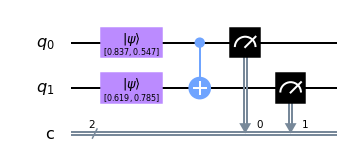

In [4]:
# parameters
num_q = 2                   # number of qbits
num_c = 2                   # number of cbits

# a quantum circuit comprising of num_q qbits and num_c cbits
qcirc = qk.QuantumCircuit(num_q, num_c)

# randomize initial states
random_init_pure_state(qcirc, num_q)
# apply CNOT waterfall
apply_waterfall_gate('cx', qcirc, 0, num_q - 1)
# measurement on the qubits
qcirc.measure(range(num_q), range(num_c))

# visualize the gate using matplotlib
qcirc.draw(output='mpl')


## Classical Simulation

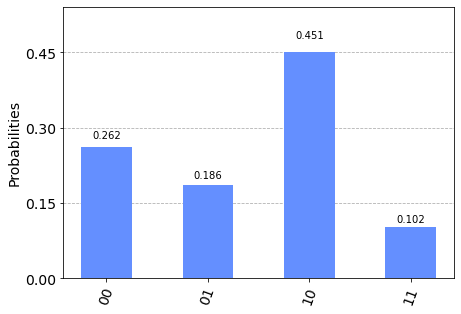

In [5]:
# run simulation in the noisy quantum simulator QASM
res = execute_classic(qcirc, 'qasm_simulator')
# visualize result
qkv.plot_histogram(res.get_counts(qcirc))

## Quantum Computation

Job Status: job has successfully run


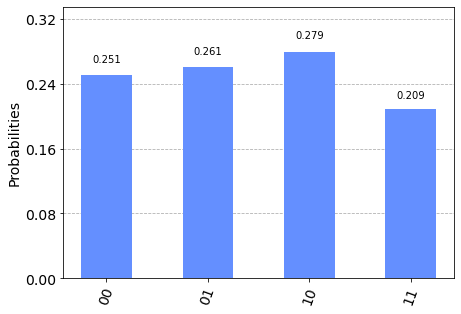

In [6]:
# run on a real quantum computer
res = execute_quantum(qcirc, 'ibmqx2')
# visualize results
qkv.plot_histogram(res.get_counts(qcirc))